# Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/trainData.csv', header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,39,0,0,0,0,0,0,208,5603,0,...,0,176,0,0,663,0,0,0,2945,2
1,7,0,0,0,0,0,0,227,511,0,...,0,150,0,1,120,0,0,0,2441,6
2,18,0,0,0,0,0,1,232,2310,0,...,0,116,0,0,234,0,0,0,3000,2
3,17,0,0,0,0,0,0,235,3849,0,...,0,119,0,0,256,0,0,0,2932,2
4,36,0,0,0,0,0,0,143,1899,0,...,0,218,0,0,216,0,0,0,3103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14523,188,0,0,0,0,0,0,105,1682,0,...,0,244,0,0,404,0,0,0,3001,2
14524,199,0,0,0,0,0,0,244,993,0,...,0,37,0,0,430,0,0,0,2848,2
14525,20,0,0,0,1,0,0,243,1933,0,...,0,0,0,0,67,0,0,0,3359,7
14526,102,0,0,0,0,0,0,247,1253,1,...,0,0,0,0,162,0,0,0,2953,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       14528 non-null  int64
 1   1       14528 non-null  int64
 2   2       14528 non-null  int64
 3   3       14528 non-null  int64
 4   4       14528 non-null  int64
 5   5       14528 non-null  int64
 6   6       14528 non-null  int64
 7   7       14528 non-null  int64
 8   8       14528 non-null  int64
 9   9       14528 non-null  int64
 10  10      14528 non-null  int64
 11  11      14528 non-null  int64
 12  12      14528 non-null  int64
 13  13      14528 non-null  int64
 14  14      14528 non-null  int64
 15  15      14528 non-null  int64
 16  16      14528 non-null  int64
 17  17      14528 non-null  int64
 18  18      14528 non-null  int64
 19  19      14528 non-null  int64
 20  20      14528 non-null  int64
 21  21      14528 non-null  int64
 22  22      14528 non-null  int64
 23  23      145

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,...,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000,14528.000000
mean,45.440391,0.001445,0.000344,0.090515,0.025468,0.051211,0.044122,212.502134,2346.228042,0.078538,...,0.003579,142.195140,0.006126,0.064290,265.883948,0.036206,0.019204,0.021545,2957.241189,2.051969
std,57.817105,0.037993,0.018549,0.286928,0.157547,0.220436,0.205373,26.511578,1565.820169,0.269026,...,0.059722,38.086566,0.078032,0.245277,210.985433,0.186809,0.137247,0.145196,282.320435,1.397067
min,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1863.000000,1.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.000000,1106.000000,0.000000,...,0.000000,120.000000,0.000000,0.000000,108.000000,0.000000,0.000000,0.000000,2803.000000,1.000000
50%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,218.000000,1967.000000,0.000000,...,0.000000,143.000000,0.000000,0.000000,216.000000,0.000000,0.000000,0.000000,2997.000000,2.000000
75%,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,231.000000,3350.000000,0.000000,...,0.000000,168.000000,0.000000,0.000000,379.000000,0.000000,0.000000,0.000000,3164.000000,2.000000
max,592.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,254.000000,7058.000000,1.000000,...,1.000000,248.000000,1.000000,1.000000,1277.000000,1.000000,1.000000,1.000000,3851.000000,7.000000


In [2]:
# Split features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Exploratory Data Analysis (EDA)

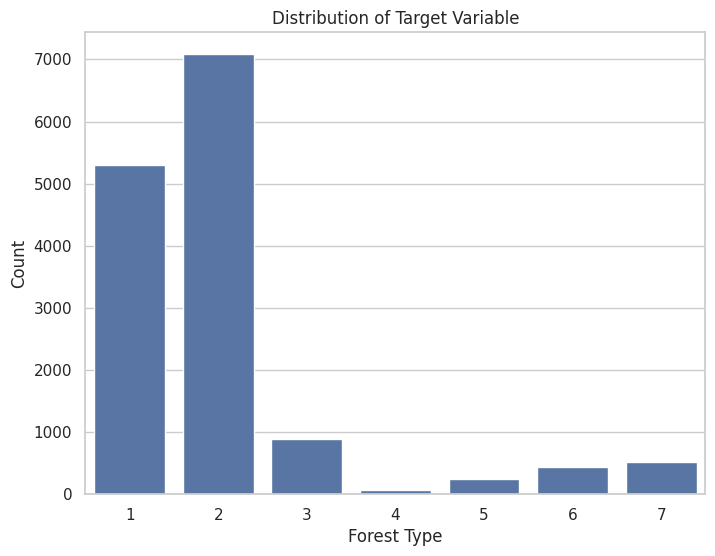

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1. Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Forest Type')
plt.ylabel('Count')
plt.show()

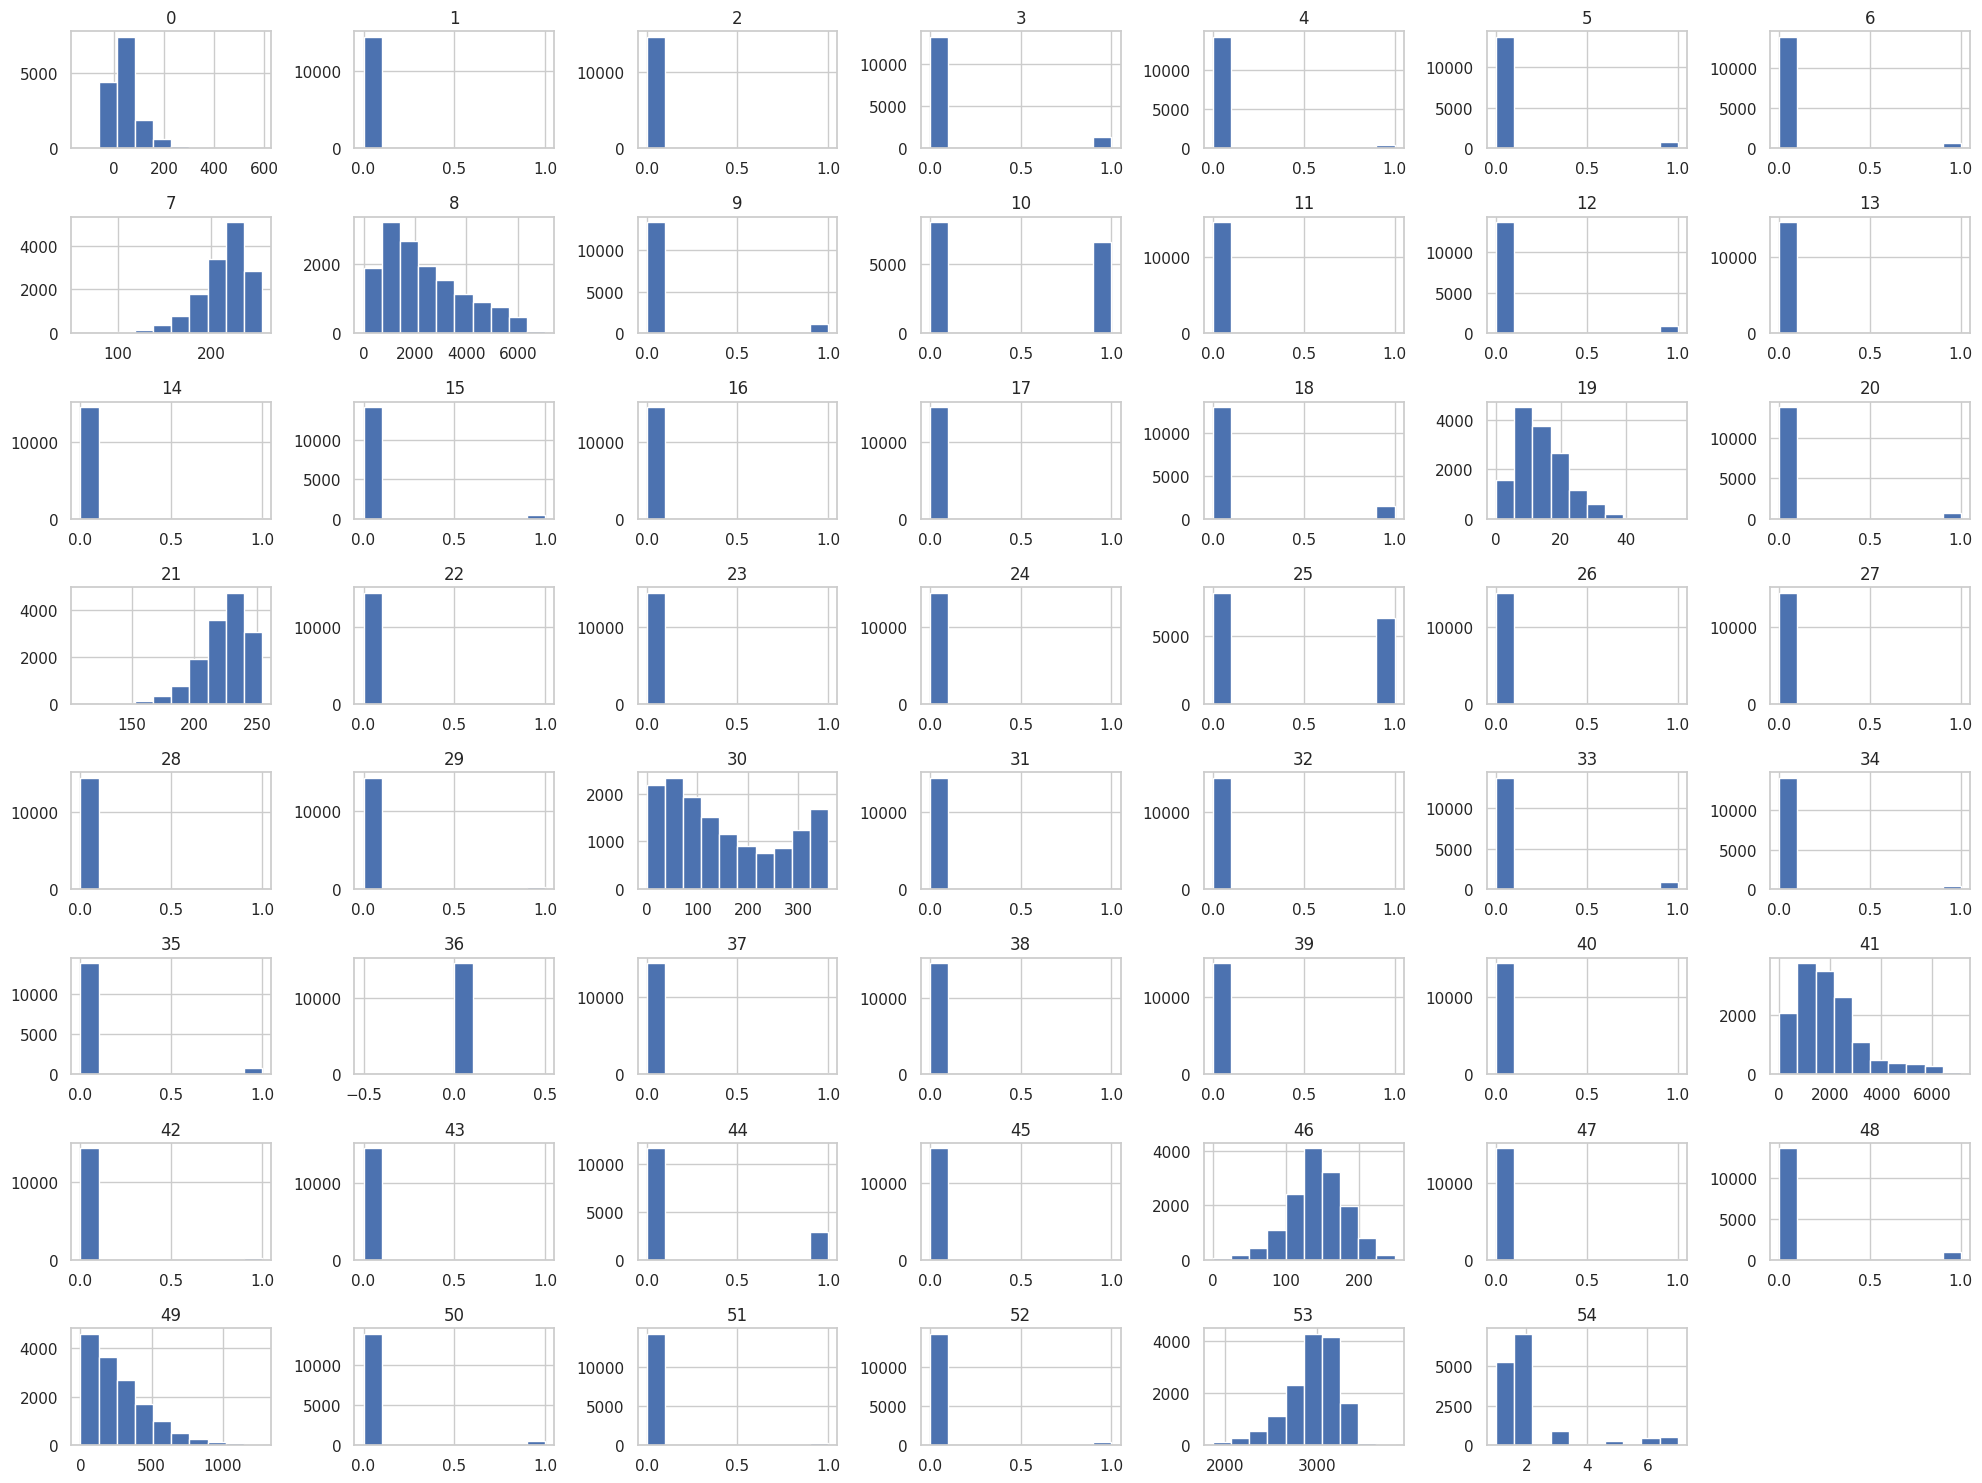

In [ ]:
# Visualize histograms for all features
data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()


# Correlation

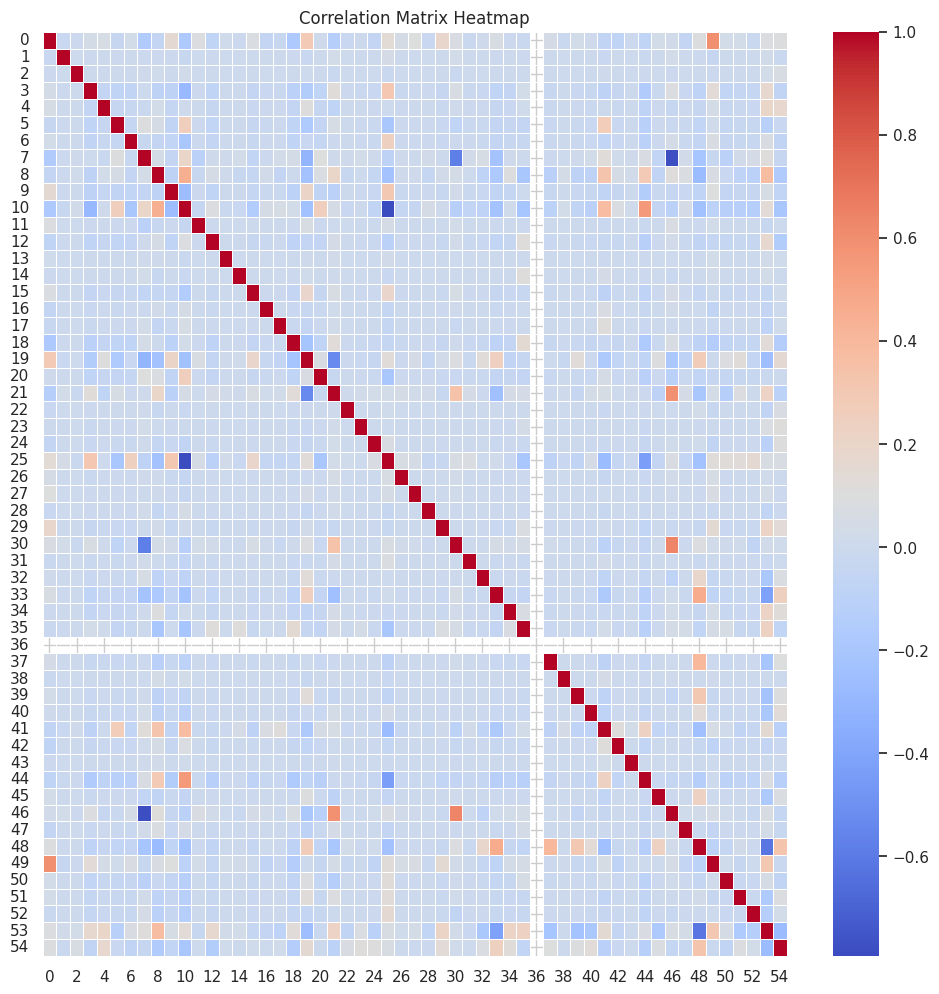

In [ ]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Preprocessing and Feature Selection

In [ ]:
! pip install imbalanced-learn

Balancing the data

In [3]:
import imblearn

# Resample the data using SMOTE
smote = imblearn.over_sampling.SMOTE()
X, y = smote.fit_resample(X, y)

In [ ]:
y.value_counts()

2    7083
6    7083
1    7083
7    7083
3    7083
4    7083
5    7083
Name: 54, dtype: int64

In [ ]:
# Preprocessing
numeric_features = X.columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Feature selection
# selector = SelectKBest(score_func=f_classif, k=20)

# Defining Models and Pipelines

In [ ]:
# Models
models = [
    ('K-NN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naïve Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier(max_iter=1000))
]

# Pipeline for each model
pipelines = []
for name, model in models:
    pipelines.append((name, Pipeline(steps=[('preprocessor', preprocessor),
                                            #  ('selector', selector),
                                             ('classifier', model)])))

# Cross-validation and Model Comparison

In [ ]:
# Cross-validation
results = {}
for name, model in pipelines:
    cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[name] = cv_results.mean()

# Display cross-validation accuracy of all models
for name, accuracy in results.items():
    print(f"Model: {name}, Cross-validation Accuracy: {accuracy}")


Model: K-NN, Cross-validation Accuracy: 0.8973599959941823
Model: Decision Tree, Cross-validation Accuracy: 0.9116397625096694
Model: Naïve Bayes, Cross-validation Accuracy: 0.44369821352644456
Model: Neural Network, Cross-validation Accuracy: 0.9163996792579703


In [ ]:
from sklearn.metrics import classification_report

# Choose the best-performing model
best_model_name = max(results, key=results.get)
best_model = dict(pipelines)[best_model_name]

# Train the best-performing model on the entire dataset
best_model.fit(X, y)

# Generate predictions using the best-performing model
best_model_predictions = best_model.predict(X)

# Generate classification report for the best-performing model
classification_rep_best_model = classification_report(y, best_model_predictions)

# Print classification report for the best-performing model
print("Classification Report for the Best Performing Model:")
print(classification_rep_best_model)


Classification Report for the Best Performing Model:
              precision    recall  f1-score   support

           1       0.85      0.86      0.85      7083
           2       0.86      0.84      0.85      7083
           3       0.92      0.97      0.94      7083
           4       0.99      1.00      1.00      7083
           5       0.98      0.99      0.99      7083
           6       0.98      0.92      0.95      7083
           7       0.99      0.98      0.99      7083

    accuracy                           0.94     49581
   macro avg       0.94      0.94      0.94     49581
weighted avg       0.94      0.94      0.94     49581



# Hyperparameter Tuning

Hyperparameter tuning on DecisionTreeClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create DecisionTreeClassifier object
dt_model = DecisionTreeClassifier()

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the highest accuracy
print("Highest Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [5]:
# Print the highest accuracy
print("Highest Accuracy:", grid_search.best_score_)

Highest Accuracy: 0.9128701196941471


Predicting for the test Data

In [6]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/testData.csv", header=None)
test

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,27,0,0,0,1,0,0,253,4044,0,...,0,0,36,0,0,42,0,0,0,3295
1,89,0,0,1,0,0,0,219,1825,0,...,0,0,104,0,0,323,0,0,0,2959
2,176,0,0,0,0,0,1,205,2779,0,...,0,0,160,0,0,594,0,0,0,2934
3,134,0,0,0,0,0,0,186,3755,0,...,0,0,158,0,0,408,0,0,0,3260
4,80,0,0,0,0,0,0,244,1423,0,...,0,0,77,0,0,180,0,0,0,2808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116200,40,0,0,0,0,0,0,245,4248,0,...,0,0,84,0,0,256,0,0,0,3110
116201,23,0,0,0,0,0,0,218,4611,0,...,0,0,144,0,0,216,0,0,0,2942
116202,50,0,0,0,0,0,0,218,3482,1,...,0,0,152,0,0,277,0,0,0,3101
116203,31,0,0,0,0,0,0,230,5020,0,...,1,0,132,0,0,309,0,0,0,3082


In [8]:
# Create a new DecisionTreeClassifier with the best parameters found
best_dt_model = DecisionTreeClassifier(**grid_search.best_params_)

# Fit the model on the entire training data
best_dt_model.fit(X, y)

# Make predictions on the test data
predictions = best_dt_model.predict(test)
predictions

array([1, 2, 2, ..., 2, 1, 5])

In [9]:
# Specify the file path where you want to save the predictions
file_path = "/content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/predictions_dt.txt"

# Write the predictions to the text file
with open(file_path, 'w') as f:
    for prediction in predictions:
        f.write(str(prediction) + '\n')

print("Predictions saved to", file_path)

Predictions saved to /content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/predictions_dt.txt


Hyperparameter tuning on Neural Networks

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create MLPClassifier object
dt_model = MLPClassifier()

# Create StandardScaler object
scaler = StandardScaler()

# Create a pipeline with scaler and classifier
pipeline = Pipeline([('scaler', scaler), ('mlp', dt_model)])

# Define the hyperparameters grid
param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50)],
    'mlp__alpha': [0.001, 0.01],
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the highest accuracy
print("Highest Accuracy:", grid_search.best_score_)

Best Parameters: {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 50)}
Highest Accuracy: 0.9207562543211113


In [15]:
# Create a new DecisionTreeClassifier with the best parameters found
best_nn_model = MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,50))

# Fit the model on the entire training data
best_nn_model.fit(X, y)

# Make predictions on the test data
predictions = best_nn_model.predict(test)
predictions

array([7, 1, 2, ..., 2, 1, 2])

In [16]:
# Specify the file path where you want to save the predictions
file_path = "/content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/predictions_nn.txt"

# Write the predictions to the text file
with open(file_path, 'w') as f:
    for prediction in predictions:
        f.write(str(prediction) + '\n')

print("Predictions saved to", file_path)

Predictions saved to /content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/predictions_nn.txt


Hyperparameter tuning on KNeighborsClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNeighborsClassifier object
knn_model = KNeighborsClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
}

# Perform grid search
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the highest accuracy
print("Highest Accuracy:", grid_search.best_score_)

# Create a new KNeighborsClassifier with the best parameters found
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)

# Fit the model on the entire training data
best_knn_model.fit(X, y)

# Make predictions on the test data
y_pred = best_knn_model.predict(test)

y_pred

Best Parameters: {'n_neighbors': 3}
Highest Accuracy: 0.9374962348850847


array([1, 2, 2, ..., 2, 1, 2])

In [19]:
# Specify the file path where you want to save the predictions
file_path = "/content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/predictions_knn.txt"

# Write the predictions to the text file
with open(file_path, 'w') as f:
    for prediction in y_pred:
        f.write(str(prediction) + '\n')

print("Predictions saved to", file_path)

Predictions saved to /content/drive/MyDrive/Colab Notebooks/Fiverr/dd_hauboy/predictions_knn.txt
